# Test RF on new data

In [2]:
# install.packages("rPython",repos='http://cran.us.r-project.org')
# # “package ‘rPython’ is not available (for R version 3.6.3)”

# packageurl <- "https://cran.r-project.org/src/contrib/Archive/rPython/rPython_0.0-6.tar.gz"
# install.packages(packageurl, repos=NULL, type="source")
# # “installation of package ‘/tmp/Rtmp4Wu00p/downloaded_packages/rPython_0.0-6.tar.gz’ had non-zero exit status”

# wget https://cran.r-project.org/src/contrib/Archive/rPython/rPython_0.0-6.tar.gz
# R CMD INSTALL ggplot2_0.9.1.tar.gz

In [57]:
# # this worked:
# require(devtools)
# install_version("rPython", version = "0.0-6", repos = "http://cran.us.r-project.org")

In [56]:
# install.packages("rgl", dependencies = TRUE)
# Warning message in install.packages("rgl", dependencies = TRUE):
# “installation of package ‘rgl’ had non-zero exit status”
# Warning message in install.packages("rgl", dependencies = TRUE):
# “installation of package ‘alphashape3d’ had non-zero exit status”

In [55]:
# # this worked:
# install.packages("devtools")
# library(devtools)
# install.packages("rgl")
# library(rgl)

In [ ]:
# Had to install magick via:
# sudo apt-get install libmagick++-dev

In [83]:
# install.packages("stringdist")

Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)



In [3]:
library(dplyr)
library(data.table)
library(partykit)
library(tictoc)
library(caret)
library(e1071)
library(randomForest)
library(ranger)

#for 3d plotting
library(akima)
library(plotly)

# for prep data
library(rPython)
library(stringr)
library(pbapply)
library(stringdist)

getwd()


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm

Loading required package: lattice

Loading required package: ggplot2

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘ranger’


The following object is masked from ‘package:randomForest’:

    importance



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:sta

[1] "/home/jupyter/local/Domains_202003/scripts/phaseII_gcloudaccess"

In [60]:

source('../orig/functions.R')

source('../orig/functions_models.R')

source('functions_eval.R')


## load data & model

ranger_03 was trained in dtree_xl notebook on the following predictors:


renewal_status ~

tld

registrar

reseller

reseller_country

region

reg_period

sld_type

sld_length

day_domains

gibb_score

pattern_domain_count

In [3]:
# system("gsutil cp gs://data_outputt/output/expiry_data /home/jupyter/local/Domains_202003/data/expiry_data")
# expiry_data <- readRDS("/home/jupyter/local/Domains_202003/data/expiry_data")

# system("gsutil cp gs://data_outputt/output/ranger_03 /home/jupyter/local/Domains_202003/data/ranger_03")
# load('../../data/ranger_03')


In [60]:
ls()

[1] "expiry_data"    "expiry_test"    "expiry_train"   "expiry_vars"   
[5] "packageurl"     "ranger_03"      "ranger_03_vars" "test_index"    
[9] "train_index"

## create test train split

In [6]:
# set.seed(0)
# train_index <- sample(1:nrow(expiry_data), 0.8 * nrow(expiry_data))
# test_index <- setdiff(1:nrow(expiry_data), train_index)

# expiry_train <- expiry_data[train_index,]
# expiry_test <- expiry_data[test_index,]

In [7]:
# Not Renewd    Renewed 
#  0.8257068  0.1742932 

# Not Renewd    Renewed 
#  0.8248038  0.1751962 

prop.table(table(expiry_train$renewal_status))
prop.table(table(expiry_test$renewal_status))


Not Renewd    Renewed 
 0.8257068  0.1742932 


Not Renewd    Renewed 
 0.8248038  0.1751962 

In [8]:
# saveRDS(expiry_train,"../../data/output/expiry_train")
# saveRDS(expiry_test,"../../data/output/expiry_test")
# system("gsutil cp /home/jupyter/local/Domains_202003/data/output/* gs://data_outputt/output/")

# expiry_train <- readRDS(file.path('../../data/output/',"expiry_data"))

In [2]:
# expiry_data <- readRDS("/home/jupyter/local/Domains_202003/data/expiry_data")
# expiry_train <- readRDS("/home/jupyter/local/Domains_202003/data/expiry_train")
# expiry_test <- readRDS("/home/jupyter/local/Domains_202003/data/expiry_test")

# expiry_test_prepped <- readRDS("/home/jupyter/local/Domains_202003/data/output/expiry_test_prepped")

expiry_test_prepped_2 <- readRDS("/home/jupyter/local/Domains_202003/data/output/expiry_test_prepped_2")

# system("gsutil cp gs://data_outputt/output/ranger_03 /home/jupyter/local/Domains_202003/data/ranger_03")
# load('../../data/ranger_03')


In [9]:
dim(expiry_test)
dim(expiry_test_prepped)

[1] 348672     27

[1] 348591     39

In [4]:
length(expiry_test_prepped_2)

[1] 1765

In [7]:
library(data.table)
expiry_test_df <- rbindlist(expiry_test_prepped_2, fill=TRUE)

In [8]:
dim(expiry_test_df)

[1] 348591     39

## gen gibb score

In [ ]:
# see script prep_expiry.R

# python.load("../orig/gibb_detect/gib_detect.py",TRUE)

# suppressWarnings(expiry_train_prepped <- prep_domain_data(expiry_train))

# ls()


# suppressWarnings(expiry_test_prepped <- prep_domain_data(expiry_test))

# dim(expiry_train)
# dim(expiry_train_prepped)
# dim(expiry_test)
# dim(expiry_test_prepped)

# saveRDS(expiry_train_prepped,"../../data/output/expiry_train_prepped")
# saveRDS(expiry_test_prepped,"../../data/output/expiry_test_prepped")
# system("gsutil cp /home/jupyter/local/Domains_202003/data/output/* gs://data_outputt/output/")

# # expiry_train <- readRDS(file.path('../../data/output/',"expiry_data"))

# prep_domain_data<-function(domain_data) {
# domain_data<-basic_prep_domain_data(domain_data)
# # python.load("/home/radmin/npv_project/gibb_detect/gib_detect.py",TRUE)
# # 



# # 
# #Get Gibberish Scores for all SLDs

# domain_data$gibb_score<-mapply(python.call, "gibberish_test", domain_data$sld)

# #Get Coeff-Variation on all days
# domain_data<-pblapply(split(domain_data, domain_data$creation_date), 
#                     function(i) get_cluster_large(i, 0.3, 30000))
# domain_data<-rbindlist(domain_data)
# domain_data$gibb_score<-round(domain_data$gibb_score*100,2)

# return(domain_data)
# }



# python.load("../orig/gibb_detect/gib_detect_train.py",TRUE)


# python.load("../orig/gibb_detect/gib_detect.py",TRUE)

# # 
# #Get Gibberish Scores for all SLDs

# domain_data$gibb_score<-mapply(python.call, "gibberish_test", domain_data$sld)

# #Get Coeff-Variation on all days
# domain_data<-pblapply(split(domain_data, domain_data$creation_date), 
#                     function(i) get_cluster_large(i, 0.3, 30000))
# domain_data<-rbindlist(domain_data)
# domain_data$gibb_score<-round(domain_data$gibb_score*100,2)

## test ranger_03 on expiry_test

In [18]:
# Aggregating predictions.. Progress: 72%. Estimated remaining time: 12 seconds.
# model predict: 86.684 sec elapsed
# eval saving: 0.146 sec elapsed

tic("model predict")
ranger_predict_03_exptest <- predict(ranger_03, 
                          data = expiry_test_prepped,
                          type="response")$predictions
toc()

tic("eval saving")

ranger_predict_03_exptest <- as.data.frame(ranger_predict_03_exptest)$Renewed

save(ranger_predict_03_exptest, 
     file="../../data/output/ranger_predict_03_exptest")
toc()


Aggregating predictions.. Progress: 72%. Estimated remaining time: 12 seconds.
model predict: 86.684 sec elapsed
eval saving: 0.146 sec elapsed


In [21]:
head(ranger_predict_03_exptest)

[1] 0.29780992 0.18199561 0.22687120 0.02133564 0.19347952 0.43249667

In [19]:
length(ranger_predict_03_exptest)

[1] 348591

In [16]:
dim(na.omit(expiry_test_prepped))

[1] 140  39

In [17]:
dim(expiry_test_prepped)

[1] 348591     39

In [20]:
head((expiry_test_prepped)$renewal_status)

[1] Renewed    Renewed    Renewed    Not Renewd Renewed    Renewed   
Levels: Not Renewd Renewed

In [24]:
actual <- as.character((expiry_test_prepped)$renewal_status)
head(actual)

[1] "Renewed"    "Renewed"    "Renewed"    "Not Renewd" "Renewed"   
[6] "Renewed"

In [27]:
# load("../../data/output/ranger_03")
# load("../../data/output/ranger_predict_03_exptest")

# confusionMatrix(table(ranger_predict_03_exptest, expiry_test_prepped$renewal_status),
#                 positive = "Renewed")

confusionMatrix(ranger_predict_03_exptest, actual,
                positive = "Renewed")

ERROR: Error: `data` and `reference` should be factors with the same levels.


In [29]:
ranger_03_pred_df = data.frame("actual" = expiry_test_prepped$renewal_status,
          "predicted" = ranger_predict_03_exptest)

In [35]:
# lift df: 23.675 sec elapsed
# gains plot: 0.046 sec elapsed
# auc: 0.007 sec elapsed
tic("lift df")
lift_df_ranger_03 <- chart_lift(pred_df = ranger_03_pred_df,
                        dep_var = "actual",
                        pred_var = "predicted")

toc()
tic("gains plot")
gains_plot_ranger_03 <- plot_gains (lift_df_ranger_03) 

toc()
tic("auc")
auc_ranger_03 <- calc_auc(lift_df_ranger_03)
toc()


saveRDS(lift_df_ranger_03, file.path('../../data/',"lift_df_ranger_03"))


lift df: 2.074 sec elapsed
gains plot: 0.072 sec elapsed
auc: 0.038 sec elapsed


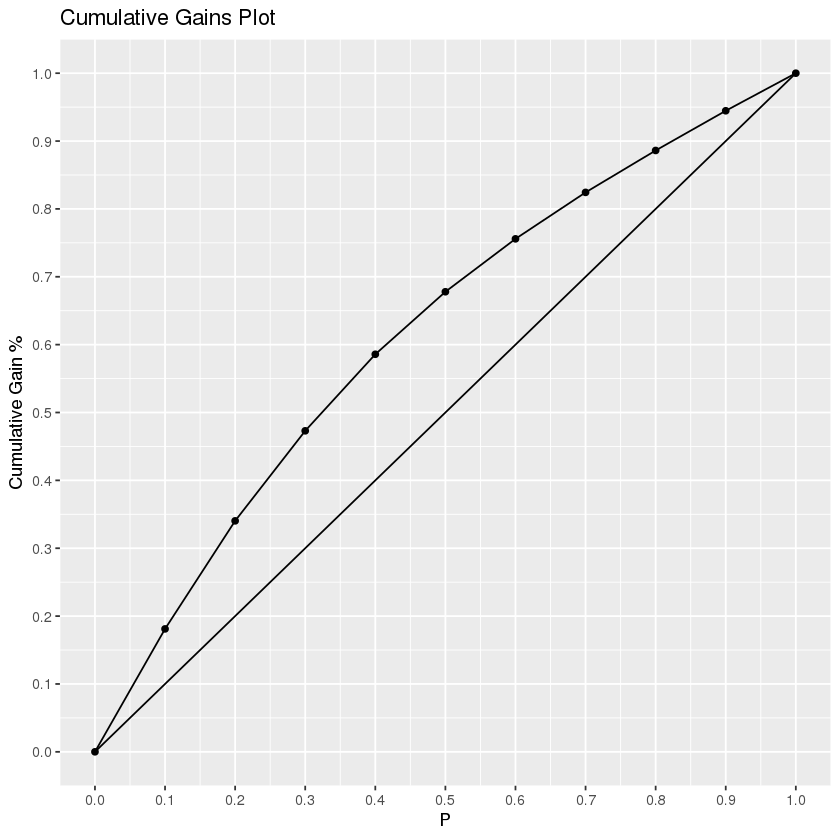

In [36]:
gains_plot_ranger_03

In [38]:
file_list <- c("lift_df_segglm",
                    "lift_df_bendtr",
#                     "lift_df_xldtr",
#                     "lift_df_xldtr_2",
#                     "lift_df_ranger1",
                    "lift_df_ranger3"
#                     "ranger_01",
              )
assign(file_list[1], readRDS(sprintf("../../data/%s", file_list[1])))
assign(file_list[2], readRDS(sprintf("../../data/%s", file_list[2])))
assign(file_list[3], readRDS(sprintf("../../data/%s", file_list[3])))
     

In [44]:
plot_multigains_03_summ <- plot_multigains(
    lift_df_list=list(
        seg_glm = lift_df_segglm, 
        ben_dtr = lift_df_bendtr,
        rf_500tr = lift_df_ranger3,
        rf_newd = lift_df_ranger_03),
    auc_list = list(
        seg_glm = calc_auc(lift_df_segglm), 
        ben_dtr= calc_auc(lift_df_bendtr), 
        rf_500tr= calc_auc(lift_df_ranger3), 
        rf_newd= calc_auc(lift_df_ranger_03)))
png(file = "../../data/output/plot_multigains_03_newdata_summ.png",
    width = 500, height = 375)
plot(plot_multigains_03_summ)
dev.off()

png 
  2

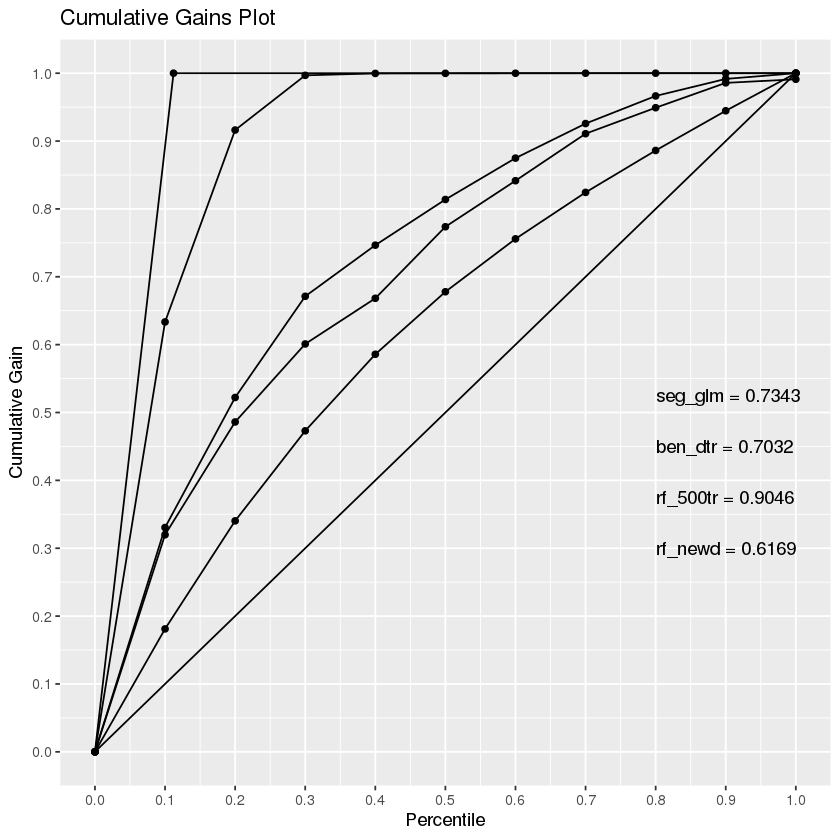

In [45]:
plot_multigains_03_summ

In [46]:
system("gsutil cp /home/jupyter/local/Domains_202003/data/output/* gs://data_outputt/output/")

In [47]:
lift_df_ranger_03

P,actu_renwd2,gain,lift
<dbl>,<int>,<dbl>,<dbl>
0.1,11057,0.1811198,1.811198
0.2,20777,0.3403387,1.701694
0.3,28877,0.4730212,1.576737
0.4,35763,0.5858177,1.464544
0.5,41386,0.6779256,1.355851
0.6,46146,0.7558970,1.259828
0.7,50326,0.8243677,1.177668
0.8,54097,0.8861388,1.107673
0.9,57668,0.9446337,1.049593


lift_df_ranger3

In [49]:
lift_df_segglm

P,actu_renwd2,gain,lift
<dbl>,<int>,<dbl>,<dbl>
0.1,14576,0.3305215,3.305215
0.2,23027,0.5221542,2.610771
0.3,29601,0.6712245,2.237415
0.4,32925,0.7465986,1.866497
0.5,35893,0.8139002,1.627800
0.6,38582,0.8748753,1.458125
0.7,40827,0.9257823,1.322546
0.8,42622,0.9664853,1.208107
0.9,43729,0.9915873,1.101764


# how well does seg_glm perf on this data?

In [56]:
# filename='first_renewal_model'
# system(paste(sprintf("gsutil cp gs://data_input/%s /home/jupyter/local/Domains_202003/data/", filename)))
# assign(filename, readRDS(sprintf("../../data/%s", filename)))

In [62]:
rm(first_renewal_model)

In [63]:
filename='first_renewal_model_train'
system(paste(sprintf("gsutil cp gs://data_input/%s /home/jupyter/local/Domains_202003/data/", filename)))
assign(filename, readRDS(sprintf("../../data/%s", filename)))

In [65]:
test <- readRDS(sprintf("../../data/test"))

In [66]:
length(test)

[1] 32

In [71]:
names(test)

[1] "fungmo"           "fungo daddy"      "funnamecheap"     "hostgmo"         
 [5] "hostgo daddy"     "hostnamecheap"    "in.netgmo"        "in.netnamecheap" 
 [9] "onlinegmo"        "onlinego daddy"   "onlinenamecheap"  "pressgmo"        
[13] "pressgo daddy"    "pressnamecheap"   "pwgmo"            "pwgo daddy"      
[17] "pwnamecheap"      "sitegmo"          "sitego daddy"     "sitenamecheap"   
[21] "spacegmo"         "spacego daddy"    "spacenamecheap"   "storegmo"        
[25] "storego daddy"    "storenamecheap"   "techgmo"          "techgo daddy"    
[29] "technamecheap"    "websitegmo"       "websitego daddy"  "websitenamecheap"

In [72]:
dim(test$fungmo)

[1] 3405   38

In [73]:
head(test$fungmo)

renewal_type,renewed_count,expiry_date,domain_id,domain,creation_date,status,tld,registrar,reseller,⋯,sld_length,sld_type2,day_domains,log_reg_arpt,gibb_score,cluster,pattern,pattern_score,pattern_domain_count,first_renewal_prediction
<chr>,<chr>,<date>,<int>,<chr>,<date>,<chr>,<fct>,<chr>,<chr>,⋯,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<dbl>
FirstTime,1,2018-04-06,46569775,onamae.fun,2017-04-06,Active,fun,gmo,gmo,⋯,6,6l,8,2.079442,3.59,1,onamae,0.015625,1,0.31528793
FirstTime,1,2018-04-06,46575244,doi.fun,2017-04-06,Active,fun,gmo,gmo,⋯,3,3l,8,2.079442,2.25,2,doi,0.015625,1,0.49457900
FirstTime,1,2018-04-06,46575320,kawaii.fun,2017-04-06,Active,fun,gmo,gmo,⋯,6,6l,8,2.079442,1.99,3,kawaii,0.015625,1,0.40847761
FirstTime,1,2018-04-06,46576724,sas.fun,2017-04-06,Active,fun,gmo,gmo,⋯,3,3l,8,2.079442,6.21,4,sas,0.015625,1,0.42897224
FirstTime,1,2018-04-06,46596244,bnr32.fun,2017-04-06,Active,fun,gmo,gmo,⋯,5,5ln,8,2.079442,0.09,5,bnr32,0.015625,1,0.04774799
FirstTime,1,2018-04-06,46599435,foodian.fun,2017-04-06,Active,fun,gmo,gmo,⋯,7,7l,8,2.079442,5.64,6,foodian,0.015625,1,0.43453279


# need to use predict from original functions

In [ ]:
domain_data$tld_registrar_index<-tolower(paste(domain_data$tld, 
                                             domain_data$reseller,sep=""))
tld_registrar_data<-split(domain_data, 
                        domain_data$tld_registrar_index)

In [64]:
tic("seg_glm new_data predict")
seg_glm_exptest <- mass_predict_first_renewal(expiry_test_prepped, first_renewal_model_train)
toc()
saveRDS(seg_glm_exptest,"../../data/output/seg_glm_exptest")


[1] "renewal_type"
[1] "renewed_count"
[1] "expiry_date"
[1] "domain_id"
[1] "domain"
[1] "creation_date"
[1] "status"
[1] "tld"
[1] "registrar"
[1] "reseller"
[1] "reseller_country"
[1] "region"
[1] "reg_period"
[1] "registrant_country"
[1] "renewal_status"
[1] "renew_mbg"
[1] "renew_type"
[1] "autorenew_type"
[1] "renew_date"
[1] "renew_registrar"
[1] "renew_reseller"
[1] "reg_revenue"
[1] "reg_arpt"
[1] "renew_period"
[1] "renew_domain_revenue"
[1] "renew_arpt"
[1] "reg_arpt_org"
[1] "sld"
[1] "sld_type"
[1] "sld_length"
[1] "sld_type2"
[1] "day_domains"
[1] "log_reg_arpt"
[1] "tld_registrar_index"
[1] "gibb_score"
[1] "pattern"
[1] "cluster"
[1] "pattern_score"
[1] "pattern_domain_count"


ERROR: Error in rbindlist(test_data): Input is data.table but should be a plain list of items to be stacked


In [ ]:
first_renewal_model_test_predict <- readRDS(
#   "../../data/output/dtree/first_renewal_model_test_predict")
# 
# first_renewal_model_test_predBin <- ifelse(
#   first_renewal_model_test_predict$first_renewal_prediction >.5, 
#   "Renewed", "Not Renewd")
# confusionMatrix(table(first_renewal_model_test_predBin, 
#                       first_renewal_model_test_predict$renewal_status), 
#                 positive = "Renewed")
# 
# #                Not Renewd Renewed
# # Not Renewd       342410   40584
# # Renewed            3307    3516
# 
# # Sensitivity : 0.07973 (vs  0.044921 on  dtree_md5_tt)  
# # Specificity : 0.99043 (vs 0.995603 on dtree_md5_tt)
# 
# 

In [57]:
# Aggregating predictions.. Progress: 72%. Estimated remaining time: 12 seconds.
# model predict: 86.684 sec elapsed
# eval saving: 0.146 sec elapsed

tic("model predict")
seg_glm_exptest <- predict(first_renewal_model, 
                          data = expiry_test_prepped,
                          type="response")$predictions
toc()

tic("eval saving")

seg_glm_exptest <- as.data.frame(seg_glm_exptest)$Renewed

save(seg_glm_exptest, 
     file="../../data/output/seg_glm_exptest")
toc()


model predict: 0.006 sec elapsed
eval saving: 0.005 sec elapsed


In [58]:
seg_glm_exptest

NULL

In [ ]:
ranger_03_pred_df = data.frame("actual" = expiry_test_prepped$renewal_status,
          "predicted" = ranger_predict_03_exptest)